In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

In [7]:
IMG_PATH = 'qr-files/'

['qr-code.jpg', 'qr3.jpg', 'qr4.jpg', 'qr5.jpg', 'qr6.jpg']

In [125]:
def image_encoder(im_array, border=5, random_seed=88, steps=10):
    im_array = im_array
    border = border
    seed = random_seed
    steps = steps
    
    random.seed(seed)
    for r in range(im_array.shape[2]):        
        for i in range(border, im_array.shape[0] - border, random.randint(1,steps)):
            if im_array[i,0,r] > 150:
                im_array[i,0,r] = random.randint(200,230)
            else:
                im_array[i,0,r] = random.randint(30,50)
            for n in range(border, im_array.shape[1] - border, random.randint(1,steps)):
                if im_array[i,n,r] > 150:
                    im_array[i,n,r] = random.randint(215,230)
                else:
                    im_array[i,n,r] = random.randint(50,100)
    return im_array

def img_plotter(image, display=True, fig_size=10, output_file='qr-encoded.jpg'):
    display = display
    image = image
    fig_size = fig_size
    
    imgplot = plt.figure(figsize=(fig_size,fig_size))
    imgplot = plt.axis('off')
    imgplot = plt.imshow(image)
    imgplot = plt.savefig('encoded-files/' + output_file)    

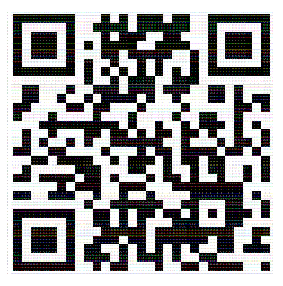

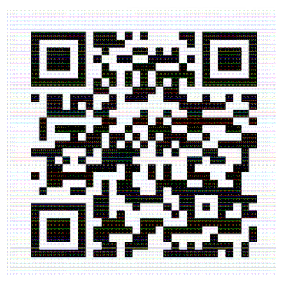

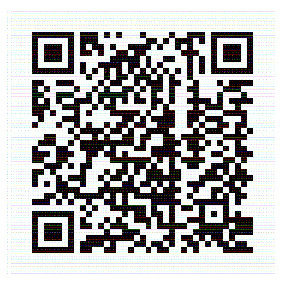

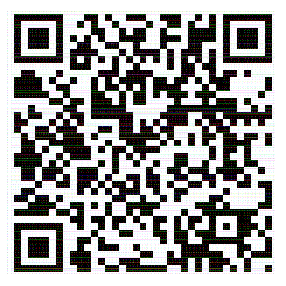

In [126]:
for image in os.listdir(IMG_PATH):  
    I = np.asarray(Image.open(os.path.join(IMG_PATH, image)))
    I2 = np.copy(I)
    if len(I2.shape) <  3:
        print('WARNING: Imagem {0} é 2D, skipping!'.format(image))
    else:    
        I2 = image_encoder(I2, random_seed=87, steps=5)
        im = Image.fromarray(np.uint8(I2))
        img_plotter(im, fig_size=5, output_file=image)